In [1]:
import os
import gc

import pandas as pd
import numpy as np

import sys
sys.path.append("..")

from plot import plot_segment_grid

print(os.getcwd())

c:\Users\erich\Desktop\HYU\신용카드 고객 세그먼트 분류 공모전\eda\2.신용정보


In [2]:
temp = pd.read_parquet(f"../../data/train/1.회원정보/201807_train_회원정보.parquet")
segment = temp["Segment"]

del temp
gc.collect()

0

info_categories = ["customer", "credit", "sales", "billing", "balance", "channel", "marketing", "performance"]

In [3]:
credits = []

months = [7, 8, 9, 10, 11, 12]

for month in months:
    # train = pd.read_parquet(f"../data/train/1.회원정보/2018{month:02}_train_회원정보.parquet")
    # test = pd.read_parquet(f"../data/test/1.회원정보/2018{month:02}_test_회원정보.parquet")
    # customers.append(pd.concat([train, test], ignore_index=True))
    
    temp = pd.read_parquet(f"../../data/train/2.신용정보/2018{month:02}_train_신용정보.parquet")
    temp["Segment"] = segment
    credits.append(temp)

del temp
gc.collect()

0

In [4]:
credits[0].columns

Index(['기준년월', 'ID', '최초한도금액', '카드이용한도금액', 'CA한도금액', '일시상환론한도금액', '월상환론한도금액',
       'CA이자율_할인전', 'CL이자율_할인전', 'RV일시불이자율_할인전', 'RV현금서비스이자율_할인전', 'RV신청일자',
       'RV약정청구율', 'RV최소결제비율', '자발한도감액횟수_R12M', '자발한도감액금액_R12M', '자발한도감액후경과월',
       '강제한도감액횟수_R12M', '강제한도감액금액_R12M', '강제한도감액후경과월', '한도증액횟수_R12M',
       '한도증액금액_R12M', '한도증액후경과월', '상향가능한도금액', '상향가능CA한도금액', '카드론동의여부',
       '월상환론상향가능한도금액', 'RV전환가능여부', '일시불ONLY전환가능여부', '카드이용한도금액_B1M',
       '카드이용한도금액_B2M', '특별한도보유여부_R3M', '연체감액여부_R3M', '한도심사요청건수', '한도요청거절건수',
       '한도심사요청후경과월', '한도심사거절후경과월', '시장단기연체여부_R6M', '시장단기연체여부_R3M',
       '시장연체상환여부_R6M', '시장연체상환여부_R3M', 'rv최초시작후경과일', 'Segment'],
      dtype='object')

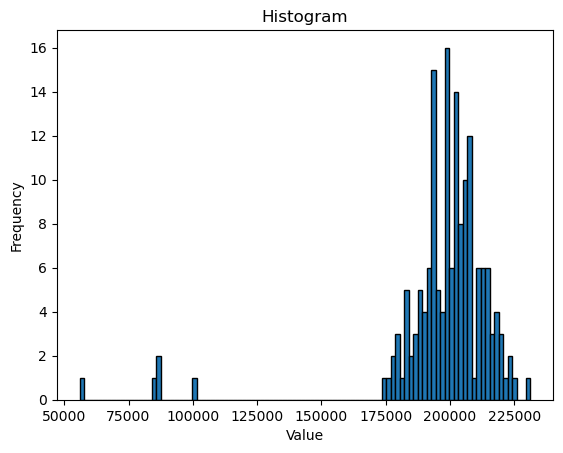

In [28]:
import matplotlib.pyplot as plt

idx = 5
segment = "A"

values = credits[idx][credits[idx]["Segment"] == segment]["카드이용한도금액"]
values.plot.hist(bins=100, edgecolor='black')
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()